### implicit 라이브러리

#### 데이터 준비

In [1]:
from typing import Union, Tuple, List

import os
import pandas as pd
import seaborn as sns
import scipy
import numpy as np
import random
from matplotlib import pyplot as plt
from datetime import datetime
from tqdm import tqdm

%matplotlib inline

from IPython.display import Image

import warnings

tqdm.pandas()
warnings.filterwarnings("ignore")

In [2]:
seed = 42

random.seed(seed)
np.random.seed(seed)

In [3]:
base_path = '/opt/ml/input/data/train'
train_df_path = os.path.join(base_path, 'train_ratings.csv')

df = pd.read_csv(train_df_path)
df['viewed'] = np.ones(df.shape[0])

display(df)
print(df.shape)

,user,item,time,viewed
0,11,4643,1230782529,1.0
1,11,170,1230782534,1.0
2,11,531,1230782539,1.0
3,11,616,1230782542,1.0
4,11,2140,1230782563,1.0
...,...,...,...,...
5154466,138493,44022,1260209449,1.0
5154467,138493,4958,1260209482,1.0
5154468,138493,68319,1260209720,1.0
5154469,138493,40819,1260209726,1.0


(5154471, 4)


In [4]:
user_item_matrix = df.pivot_table('viewed', 'user', 'item').fillna(0)
print(f'유저*아이템 매트릭스 모양 : {user_item_matrix.shape}')
print(f'유저 수 : {df.user.nunique()}')
print(f'아이템 수 : {df.item.nunique()}')


유저*아이템 매트릭스 모양 : (31360, 6807)
유저 수 : 31360
아이템 수 : 6807


In [5]:
user_num = user_item_matrix.shape[0]
movie_num = user_item_matrix.shape[1]
preference_matrix = np.copy(user_item_matrix.iloc[:user_num,:movie_num])
preference_matrix[preference_matrix > 0] = 1

### train

In [6]:
# import implicit
# import scipy

# als_model = implicit.als.AlternatingLeastSquares(factors=300, regularization=50, iterations=50)
# preference_matrix_csr = scipy.sparse.csr_matrix(preference_matrix)

In [6]:
# als_model.fit(preference_matrix_csr)

NameError: name 'als_model' is not defined

In [6]:
import pickle

with open('/opt/ml/implicit_als_model_iter50', 'rb') as f:
    als_model = pickle.load(f)

In [7]:
als_model_df = pd.DataFrame(np.matmul(als_model.user_factors.to_numpy(), als_model.item_factors.to_numpy().T), columns=user_item_matrix.iloc[:user_num,:movie_num].columns, index=user_item_matrix.iloc[:user_num,:movie_num].index)
als_model_df

item,1,2,3,4,5,6,7,8,9,10,...,116823,117176,117533,117881,118696,118700,118900,118997,119141,119145
user,,,,,,,,,,,,,,,,,,,,,
11,1.023662,0.628551,0.015923,0.001936,0.059498,-0.036197,0.043623,0.019944,0.019956,0.258995,...,-0.001644,-0.004118,-0.000312,-0.002562,-0.000686,-0.000047,-0.002477,0.000497,0.004558,-0.000819
14,0.944270,0.160981,0.067838,0.000267,0.091164,0.017380,0.155208,0.011087,-0.005200,0.055314,...,0.001470,0.002897,-0.000803,0.001809,-0.008073,-0.001762,-0.000144,0.007301,-0.002999,-0.002196
18,0.067344,-0.002495,0.010627,-0.001117,-0.003407,-0.042105,-0.006842,0.000639,0.000771,-0.011873,...,-0.004729,-0.000802,-0.000356,0.000787,-0.003790,-0.002054,-0.001109,-0.002969,-0.002279,-0.002823
25,0.329677,0.178722,0.047135,0.001796,0.010574,0.135763,0.003427,0.001986,0.001045,0.154645,...,0.004600,0.000242,-0.001367,-0.001843,0.005636,0.000196,0.000844,0.000665,0.001243,0.001657
31,0.122684,0.072973,-0.006748,-0.000366,-0.006205,-0.030118,0.007489,0.001737,0.003661,-0.064463,...,0.066500,0.006179,-0.001867,-0.001368,0.078061,-0.001257,-0.003011,0.011384,0.015273,0.015512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138473,0.367377,0.053495,-0.003675,0.000544,0.006156,0.112752,-0.000395,0.002539,-0.001194,-0.043060,...,0.006049,0.004218,-0.000013,0.001297,0.000474,0.002390,0.002680,0.002914,0.002635,0.000308
138475,0.007562,-0.064902,-0.001539,0.001031,0.004482,0.047509,-0.009321,-0.003757,-0.000005,0.014606,...,-0.002343,-0.005453,0.001000,0.000480,0.004438,-0.004069,0.001453,0.004633,-0.004413,-0.001360
138486,0.916552,0.446643,0.042377,-0.000196,0.016927,0.029431,-0.022285,0.003068,0.007152,0.223235,...,-0.001840,0.002446,0.000185,0.001282,-0.007732,0.002159,0.000963,0.001285,0.000689,0.000086


### 사용했던 아이템 & 연도 마스킹

In [8]:
als_model_df_final = als_model_df - preference_matrix * 1000
als_model_df_final

item,1,2,3,4,5,6,7,8,9,10,...,116823,117176,117533,117881,118696,118700,118900,118997,119141,119145
user,,,,,,,,,,,,,,,,,,,,,
11,-998.976338,0.628551,0.015923,0.001936,0.059498,-0.036197,0.043623,0.019944,0.019956,0.258995,...,-0.001644,-0.004118,-0.000312,-0.002562,-0.000686,-0.000047,-0.002477,0.000497,0.004558,-0.000819
14,-999.055730,0.160981,0.067838,0.000267,0.091164,0.017380,-999.844792,0.011087,-0.005200,0.055314,...,0.001470,0.002897,-0.000803,0.001809,-0.008073,-0.001762,-0.000144,0.007301,-0.002999,-0.002196
18,0.067344,-0.002495,0.010627,-0.001117,-0.003407,-0.042105,-0.006842,0.000639,0.000771,-0.011873,...,-0.004729,-0.000802,-0.000356,0.000787,-0.003790,-0.002054,-0.001109,-0.002969,-0.002279,-0.002823
25,0.329677,0.178722,0.047135,0.001796,0.010574,0.135763,0.003427,0.001986,0.001045,0.154645,...,0.004600,0.000242,-0.001367,-0.001843,0.005636,0.000196,0.000844,0.000665,0.001243,0.001657
31,0.122684,0.072973,-0.006748,-0.000366,-0.006205,-0.030118,0.007489,0.001737,0.003661,-0.064463,...,0.066500,0.006179,-0.001867,-0.001368,-999.921939,-0.001257,-0.003011,0.011384,0.015273,0.015512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138473,-999.632623,0.053495,-0.003675,0.000544,0.006156,0.112752,-0.000395,0.002539,-0.001194,-0.043060,...,0.006049,0.004218,-0.000013,0.001297,0.000474,0.002390,0.002680,0.002914,0.002635,0.000308
138475,0.007562,-0.064902,-0.001539,0.001031,0.004482,0.047509,-0.009321,-0.003757,-0.000005,0.014606,...,-0.002343,-0.005453,0.001000,0.000480,0.004438,-0.004069,0.001453,0.004633,-0.004413,-0.001360
138486,-999.083448,0.446643,0.042377,-0.000196,0.016927,0.029431,-0.022285,0.003068,0.007152,0.223235,...,-0.001840,0.002446,0.000185,0.001282,-0.007732,0.002159,0.000963,0.001285,0.000689,0.000086


In [9]:
year_df = pd.read_csv("/opt/ml/input/data/train/years.tsv", sep='\t')
title_df = pd.read_csv("/opt/ml/input/data/train/titles.tsv", sep='\t')
genre_df = pd.read_csv("/opt/ml/input/data/train/genres.tsv", sep='\t')
director_df = pd.read_csv("/opt/ml/input/data/train/directors.tsv", sep='\t')
writer_df = pd.read_csv("/opt/ml/input/data/train/writers.tsv", sep='\t')
# 결측치 확인 : 연도(year)가 없는 영화(id) 수
not_year = set(title_df['item']) - set(year_df['item'])
print('연도(year)가 없는 영화(id) 수:',len(not_year))
df_not_year = title_df[title_df['item'].isin(not_year)][['item','title']].drop_duplicates().reset_index(drop=True)

# 결측치 처리 : 영화 제목 끝부분의 연도 추출
df_add_year = pd.DataFrame([[i,int(t[t.rfind('(')+1:-1])] for i,t in df_not_year.values],columns = ['item','year'])

# 데이터 추가 : year
year_df = pd.merge(title_df,pd.concat([year_df,df_add_year]))[["item","year"]]
year_item_df = pd.merge(df, year_df, left_on = "item", right_on="item")

연도(year)가 없는 영화(id) 수: 8


In [10]:
df["time"] = pd.to_datetime(df["time"], unit='s')
df["time"] = df["time"].dt.year

In [11]:
user_year = df.groupby("user")["time"]
user_year_dict = {}
for user, group in user_year:
    user_year_dict[user] = (int(min(group)), int(max(group)))
user_year_dict = pd.DataFrame(user_year_dict)
    

In [12]:
item_year_dict = {}
for i in year_df.index:
    item_year_dict[year_df.item[i]] = year_df.year[i]
item_year_dict = pd.DataFrame(item_year_dict, index = [0])

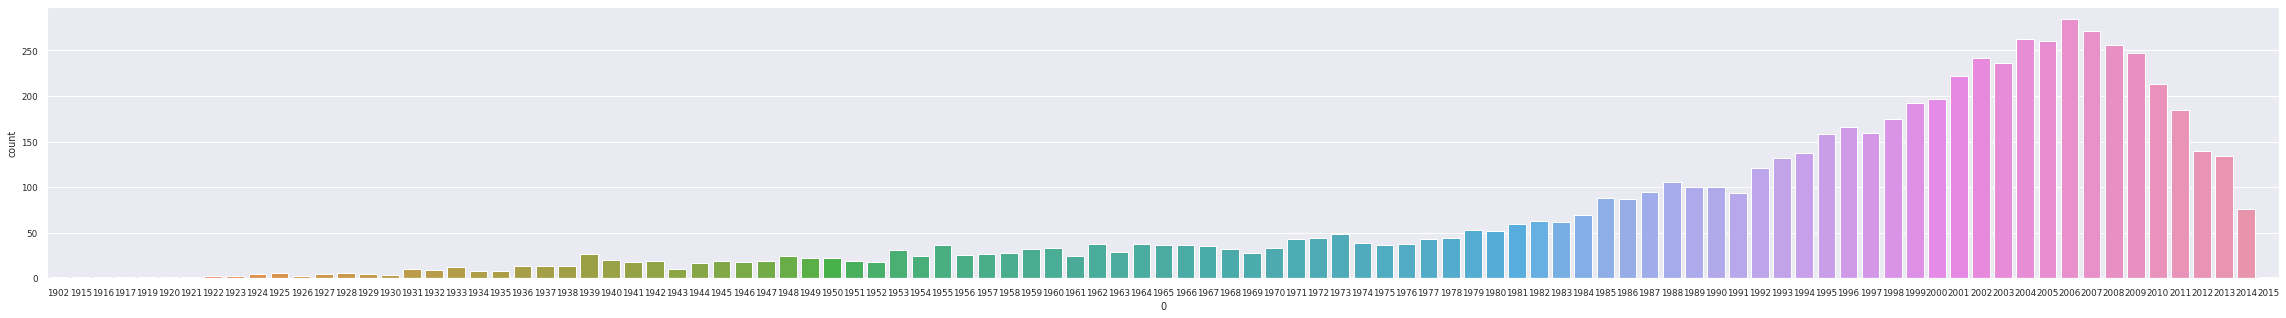

In [13]:
import seaborn
plt.figure(figsize=(40,5))
sns.set(font_scale = 0.8)
sns.countplot(x=item_year_dict.T[0])
plt.show()


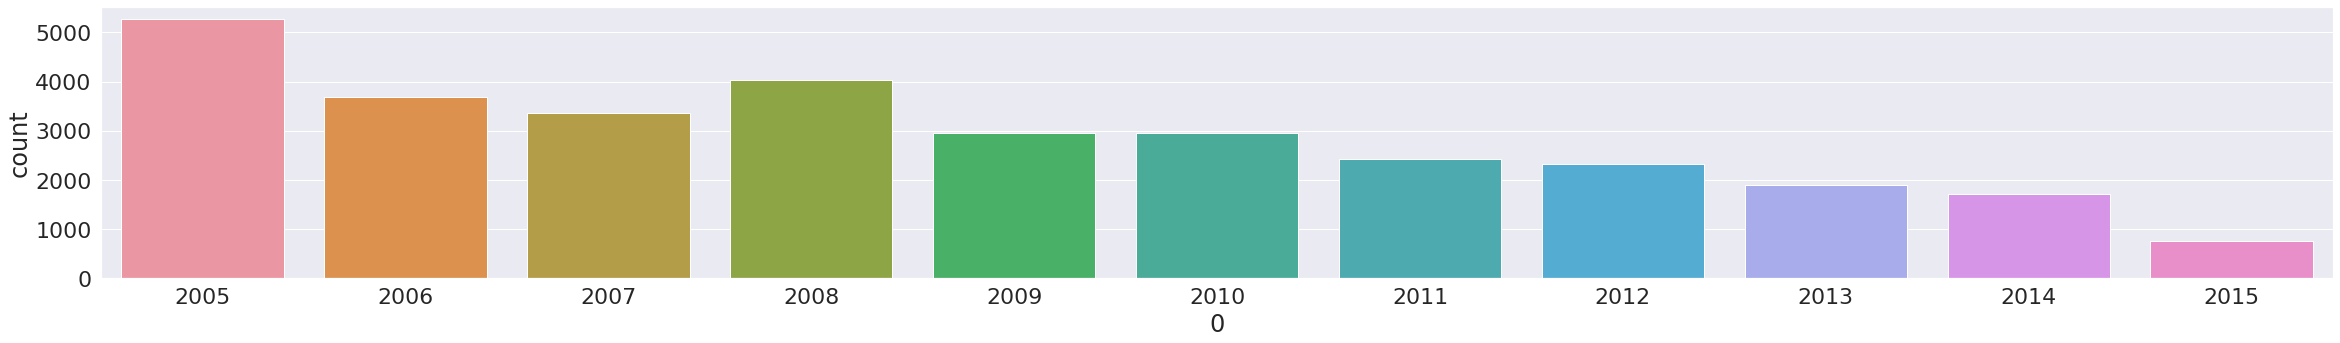

In [14]:
plt.figure(figsize=(40,5))
sns.set(font_scale = 2)
sns.countplot(x=user_year_dict.T[0])
plt.show()

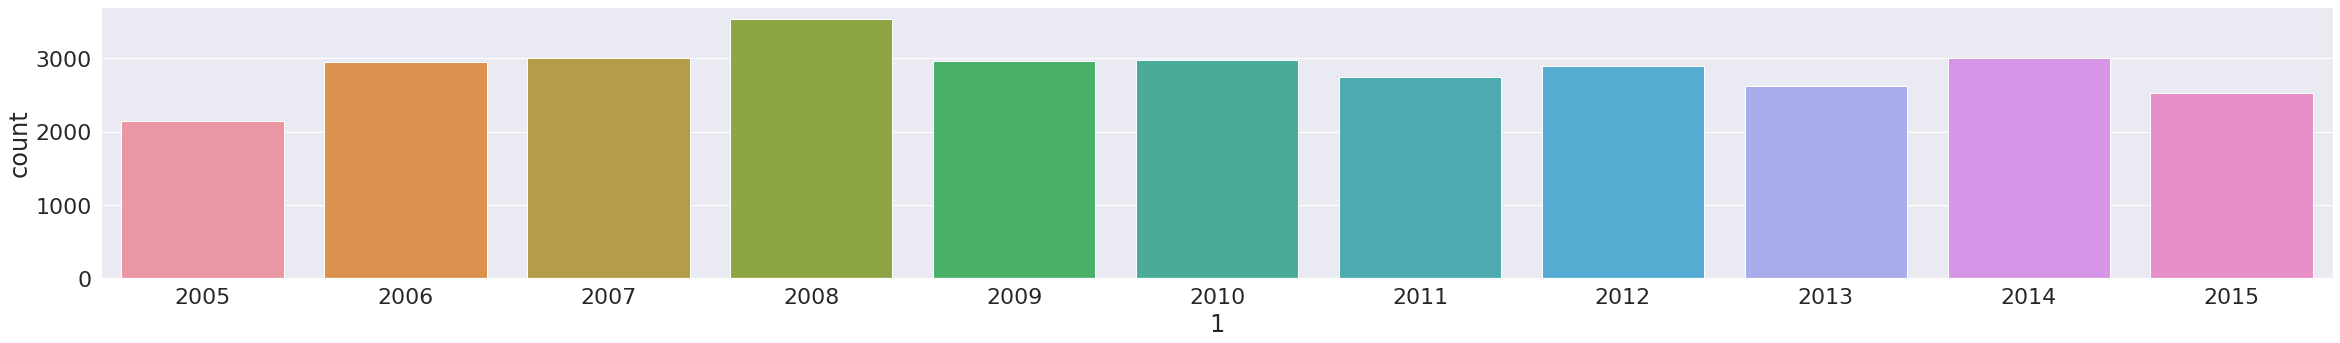

In [15]:
plt.figure(figsize=(40,5))
sns.set(font_scale = 2)
sns.countplot(x=user_year_dict.T[1])
plt.show()

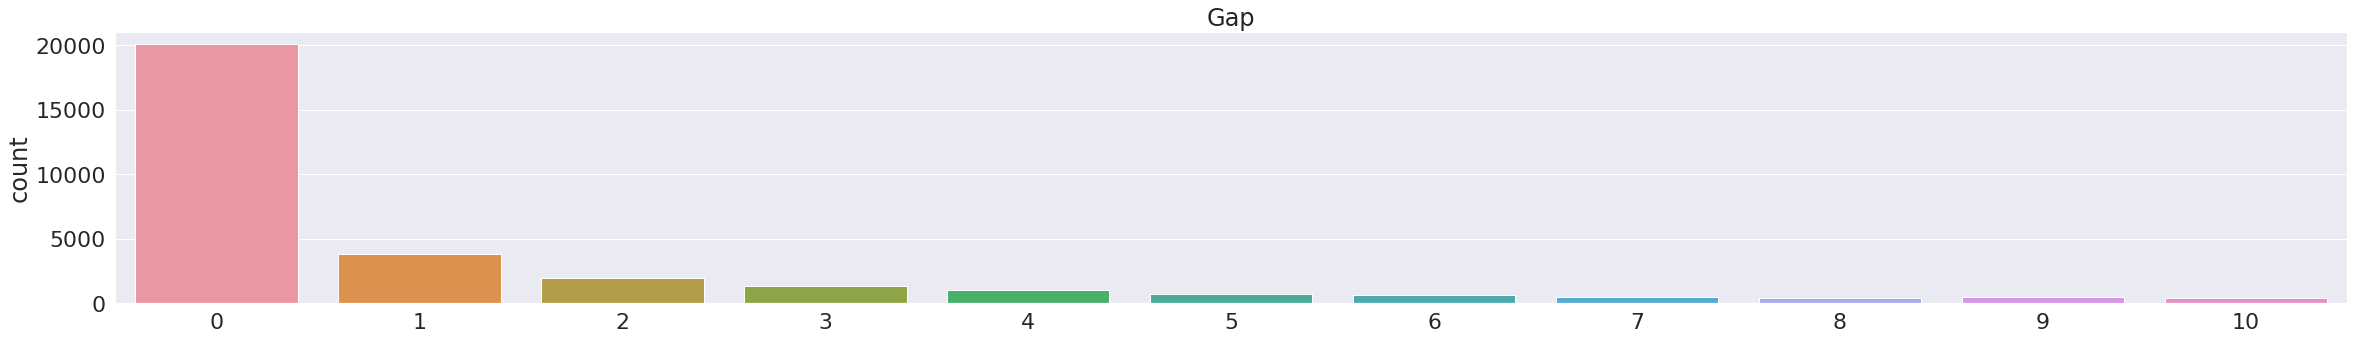

In [16]:
plt.figure(figsize=(40,5))
sns.set(font_scale = 2)
sns.countplot(x=user_year_dict.T[1]-user_year_dict.T[0]).set_title("Gap")
plt.show()

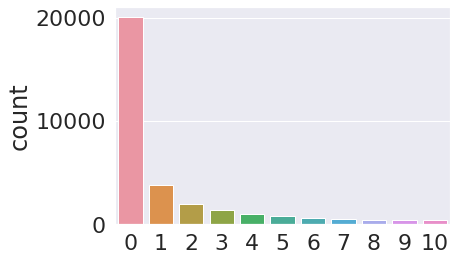

In [17]:
sns.set(font_scale = 2)
sns.countplot(x=user_year_dict.T[1]-user_year_dict.T[0])
plt.show()

### 장르마스킹 (점수감소)

In [18]:
#유저가 안본 장르면 아이템 마스킹

genres_id_list = []
genres_list = []
for_test = []
for i, genres in genre_df.groupby("item")["genre"]:
    genres_id_list.append(i)
    genres_list.append(set(genres.values))
item_genres_df = pd.DataFrame({"item":genres_id_list,"genres":genres_list})



tmp = pd.merge(df,item_genres_df, on="item")
tmp["genres"] = tmp["genres"].apply(lambda x: set(x))
user_genres = tmp.groupby("user")["genres"]

genres_set = list(set(genre_df.genre))
user_genres_df = {}
for user, genres in user_genres:
    num_genres = dict(zip(genres_set,[0 for _ in range(18)]))
    for genre in genres:
        for g in genre:
            num_genres[g]+=1
    for_test.append(num_genres)
    tmp = sorted(num_genres, key = num_genres.get, reverse=True)
    users_favorite = set(tmp)
    # users_favorite = set(tmp[:1])
    # maxi = num_genres[tmp[0]]//2
    # for i in range(1,18):
    #     if num_genres[tmp[i]]>=maxi:
    #         users_favorite.add(tmp[i])
    #     else:
    #         break

    user_genres_df[user] = users_favorite




In [ ]:

for user in user_genres_df.keys():
    user_genre = user_genres_df[user]
    items = []
    for item, genre in zip(item_genres_df.item, item_genres_df.genres):
        if len(genre - user_genre)>1:
            items.append(item)
    als_model_df_final.loc[user, items]-=1000 

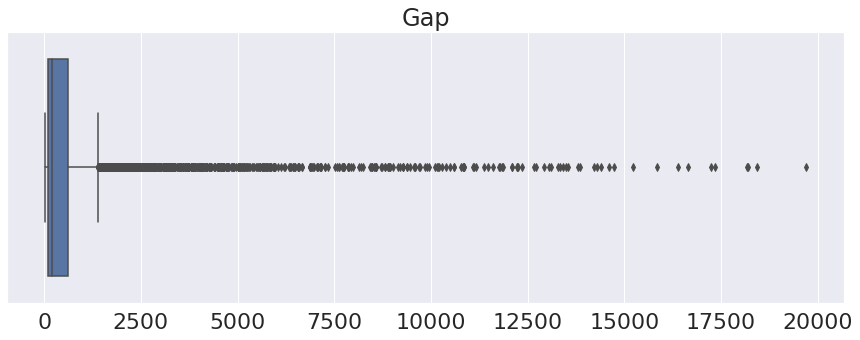

In [19]:
tmp = df.value_counts("item")
plt.figure(figsize=(15,5))
sns.boxplot(x = tmp).set_title("Gap")
plt.show()

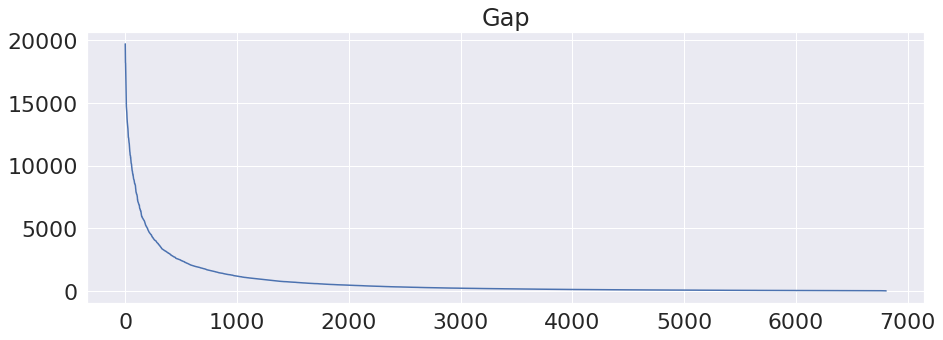

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(x = range(len(tmp)), y = tmp.values).set_title("Gap")
plt.show()

### join한 DF보기 & EDA

In [19]:
item_director_df = {"item":[],"director":[]}
for i,t in director_df.groupby("item"):
    item_director_df["item"].append(i)
    item_director_df["director"].append(set(t.director))
item_director_df = pd.DataFrame(item_director_df)
item_director_df

,item,director
0,1,{nm0005124}
1,2,{nm0002653}
2,3,{nm0222043}
3,4,{nm0001845}
4,5,{nm0796124}
...,...,...
5498,118696,{nm0001392}
5499,118900,{nm0885249}
5500,118997,{nm0551128}
5501,119141,"{nm0736622, nm1698571}"


In [20]:
item_writer_df = {"item":[],"writer":[]}
for i,t in writer_df.groupby("item"):
    item_writer_df["item"].append(i)
    item_writer_df["writer"].append(set(t.writer))
item_writer_df = pd.DataFrame(item_writer_df)
item_writer_df

,item,writer
0,1,"{nm0169505, nm0005124, nm0004056, nm0230032, n..."
1,2,"{nm0378144, nm0885575, nm0852430}"
2,3,{nm0425756}
3,4,{nm0060103}
4,5,"{nm0796124, nm0329304, nm0583600, nm0352443}"
...,...,...
5643,118696,"{nm0909638, nm0101991, nm0001392, nm0868219, n..."
5644,118900,{nm0394984}
5645,118997,{nm0487567}
5646,119141,"{nm0736622, nm1698571}"


In [21]:
df = pd.merge(year_item_df,title_df, on="item")
df["time"] = pd.to_datetime(df["time"], unit='s')
df["time"] = df["time"].dt.year
df = pd.merge(df,item_genres_df, on="item")
df = pd.merge(df,item_director_df, left_on="item", right_on="item", how="outer")
df[df.director.isna()] = df[df.director.isna()].fillna(0)
df = pd.merge(df,item_writer_df, left_on="item", right_on="item", how="outer")
df[df.writer.isna()] = df[df.writer.isna()].fillna(0)
df

,user,item,time,viewed,year,title,genres,director,writer
0,11,4643,2009,1.0,2001,Planet of the Apes (2001),"{Action, Drama, Sci-Fi, Adventure}",{nm0000318},"{nm0742797, nm0099541, nm0115310, nm0465199}"
1,189,4643,2011,1.0,2001,Planet of the Apes (2001),"{Action, Drama, Sci-Fi, Adventure}",{nm0000318},"{nm0742797, nm0099541, nm0115310, nm0465199}"
2,294,4643,2010,1.0,2001,Planet of the Apes (2001),"{Action, Drama, Sci-Fi, Adventure}",{nm0000318},"{nm0742797, nm0099541, nm0115310, nm0465199}"
3,383,4643,2009,1.0,2001,Planet of the Apes (2001),"{Action, Drama, Sci-Fi, Adventure}",{nm0000318},"{nm0742797, nm0099541, nm0115310, nm0465199}"
4,421,4643,2007,1.0,2001,Planet of the Apes (2001),"{Action, Drama, Sci-Fi, Adventure}",{nm0000318},"{nm0742797, nm0099541, nm0115310, nm0465199}"
...,...,...,...,...,...,...,...,...,...
5154466,126426,102880,2013,1.0,2013,After Earth (2013),"{Action, Sci-Fi, Adventure}",{nm0796117},"{nm1729428, nm0796117}"
5154467,127766,102880,2013,1.0,2013,After Earth (2013),"{Action, Sci-Fi, Adventure}",{nm0796117},"{nm1729428, nm0796117}"
5154468,130972,102880,2014,1.0,2013,After Earth (2013),"{Action, Sci-Fi, Adventure}",{nm0796117},"{nm1729428, nm0796117}"
5154469,131347,102880,2013,1.0,2013,After Earth (2013),"{Action, Sci-Fi, Adventure}",{nm0796117},"{nm1729428, nm0796117}"


In [22]:
item =  4270
print(genre_df[genre_df["item"]==item])

      item      genre
7974  4270     Action
7975  4270  Adventure
7976  4270     Comedy
7977  4270   Thriller


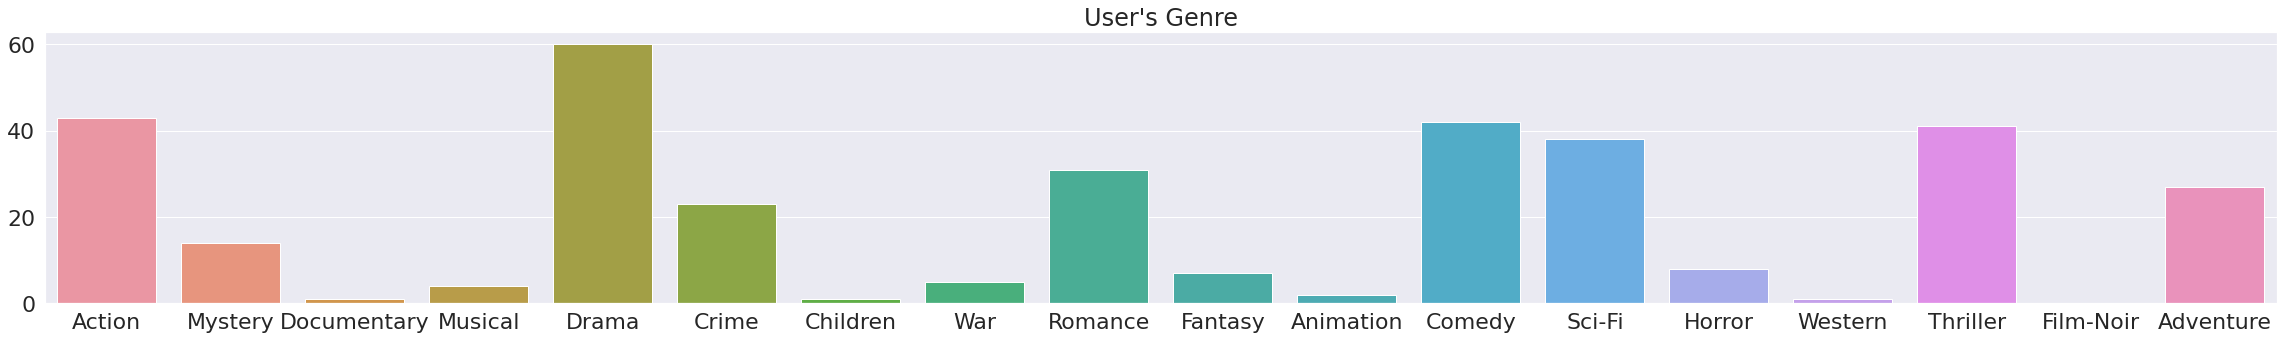

In [24]:
plt.figure(figsize=(40,5))
sns.set(font_scale = 2)
sns.barplot(x = list(for_test[0].keys()), y=list(for_test[2095].values())).set_title("User's Genre")
plt.show()

### 감독 마스킹

In [25]:
user_list = []
director_list = []
for_test_director = []
directors = list(set(director_df["director"]))
for u,g in df.groupby("user")["director"]:
    user_director_dict = dict(zip(directors, [0 for _ in range(len(directors))]))
    user_director_set = set()
    for d in g:
        if d==0:
            continue
        user_director_set=user_director_set.union(d)
        for i in d:
            user_director_dict[i]+=1
    user_list.append(u)
    director_list.append(user_director_set)
    for_test_director.append(user_director_dict)

user_director_df = pd.DataFrame({"user":user_list, "director":director_list})
user_director_df


,user,director
0,11,"{nm0006625, nm0000343, nm0591450, nm0919369, n..."
1,14,"{nm0591450, nm0000165, nm0002159, nm0003088, n..."
2,18,"{nm0001566, nm0000343, nm0002159, nm0382584, n..."
3,25,"{nm0591450, nm0919369, nm0001392, nm0751102, n..."
4,31,"{nm0213450, nm0936482, nm0001392, nm0227540, n..."
...,...,...
31355,138473,"{nm0443411, nm0000186, nm0001392, nm0000490, n..."
31356,138475,"{nm0001328, nm0167241, nm0000180, nm0715346, n..."
31357,138486,"{nm0591450, nm0000500, nm0000343, nm0003088, n..."
31358,138492,"{nm0000500, nm0000985, nm0000455, nm0905152, n..."


In [26]:
tmp = pd.DataFrame(for_test_director)
tmp_df = np.argsort(-tmp).iloc[:,:2]
tmp_df

,nm0697656,nm0591450
0,1060,832
1,1060,147
2,1226,571
3,1060,982
4,1303,959
...,...,...
31355,1201,942
31356,488,125
31357,147,1060
31358,94,658


In [59]:
user_list = []
writer_list = []
for_test_writer = []
writers = list(set(writer_df["writer"]))
for u,g in df.groupby("user")["writer"]:
    user_writer_dict = dict(zip(writers, [0 for _ in range(len(writers))]))
    user_writer_set = set()
    for d in g:
        if d==0:
            continue
        user_writer_set=user_writer_set.union(d)
        for i in d:
            user_writer_dict[i]+=1
    user_list.append(u)
    writer_list.append(user_writer_set)
    for_test_writer.append(user_writer_dict)

user_writer_df = pd.DataFrame({"user":user_list, "writer":writer_list})
user_writer_df


,user,writer
0,11,"{nm0000343, nm0365383, nm0027011, nm0919369, n..."
1,14,"{nm0713128, nm0322368, nm0027011, nm0919369, n..."
2,18,"{nm0000934, nm0365383, nm0524190, nm0491011, n..."
3,25,"{nm0365383, nm0001548, nm5927608, nm0322368, n..."
4,31,"{nm0636236, nm0436543, nm0051972, nm0606688, n..."
...,...,...
31355,138473,"{nm0001328, nm0301274, nm0001392, nm0880243, n..."
31356,138475,"{nm0168759, nm0748438, nm0329304, nm0924781, n..."
31357,138486,"{nm0365383, nm0000343, nm0322368, nm0001589, n..."
31358,138492,"{nm0911486, nm0690770, nm0000500, nm0301274, n..."


In [60]:
top_writer = pd.DataFrame(for_test_director)
top_writer_df = np.argsort(-top_writer).iloc[:,:2]
top_writer_df

,nm0697656,nm0591450
0,1060,832
1,1060,147
2,1226,571
3,1060,982
4,1303,959
...,...,...
31355,1201,942
31356,488,125
31357,147,1060
31358,94,658


### Top1 감독이 Top2감독의 3배이상인 경우가 206명

In [70]:
tmp_df["larger"]= [tmp.loc[i,tmp.columns[tmp_df.iloc[i,0]]] >= tmp.loc[i,tmp.columns[tmp_df.iloc[i,1]]]*3 for i in range(31360)]
tmp_df[tmp_df.larger]

,nm0697656,nm0591450,larger
186,1201,383,True
389,1060,1090,True
488,571,692,True
650,1060,198,True
755,488,300,True
...,...,...,...
30568,1060,147,True
30748,1060,92,True
30765,30,777,True
31026,1201,99,True


In [67]:
for i in range(3):
    user = tmp_df[tmp_df.larger].index[i]
    print(f"유저: {user_list[user]}")
    print("좋아하는 감독Top1: ", tmp.columns[tmp_df.loc[user,tmp_df.columns[0]]])
    print("좋아하는 감독Top2: ", tmp.columns[tmp_df.loc[user,tmp_df.columns[1]]])
    print("좋아하는 장르:", user_genres_df[user_list[user]])
    print("유저의 본 횟수", len(df[df.user==user_list[user]]))
    print("좋아하는 각본가Top1: ", top_writer.columns[top_writer_df.loc[user,top_writer_df.columns[0]]])
    print("좋아하는 각본가Top2: ", top_writer.columns[top_writer_df.loc[user,top_writer_df.columns[1]]])
    print()

유저: 11
좋아하는 감독Top1:  nm0000229
좋아하는 감독Top2:  nm0000386
좋아하는 장르: {'Action', 'Mystery', 'Documentary', 'Musical', 'Drama', 'Children', 'Crime', 'War', 'Fantasy', 'Animation', 'Romance', 'Comedy', 'Sci-Fi', 'Horror', 'Western', 'Thriller', 'Film-Noir', 'Adventure'}
유저의 본 횟수 376
좋아하는 각본가Top1:  nm0000229
좋아하는 각본가Top2:  nm0000386

유저: 14
좋아하는 감독Top1:  nm0000229
좋아하는 감독Top2:  nm0000709
좋아하는 장르: {'Action', 'Mystery', 'Documentary', 'Drama', 'Crime', 'Horror', 'War', 'Romance', 'Animation', 'Fantasy', 'Thriller', 'Comedy', 'Musical', 'Western', 'Children', 'Sci-Fi', 'Film-Noir', 'Adventure'}
유저의 본 횟수 180
좋아하는 각본가Top1:  nm0000229
좋아하는 각본가Top2:  nm0000709

유저: 18
좋아하는 감독Top1:  nm0000264
좋아하는 감독Top2:  nm0000095
좋아하는 장르: {'Action', 'Mystery', 'Documentary', 'Drama', 'Crime', 'Children', 'Horror', 'War', 'Romance', 'Fantasy', 'Animation', 'Comedy', 'Musical', 'Western', 'Thriller', 'Sci-Fi', 'Film-Noir', 'Adventure'}
유저의 본 횟수 77
좋아하는 각본가Top1:  nm0000264
좋아하는 각본가Top2:  nm0000095



In [62]:
item = 48780
print("감독 : ", item_director_df[item_director_df.item == item].director)
print("장르 : ", item_genres_df[item_genres_df.item==item].genres)
print("영화의 본 횟수: ", len(df[df.item==item]))

감독 :  5273    {nm0634240}
Name: director, dtype: object
장르 :  5059    {Mystery, Thriller, Drama, Sci-Fi}
Name: genres, dtype: object
영화의 본 횟수:  8572


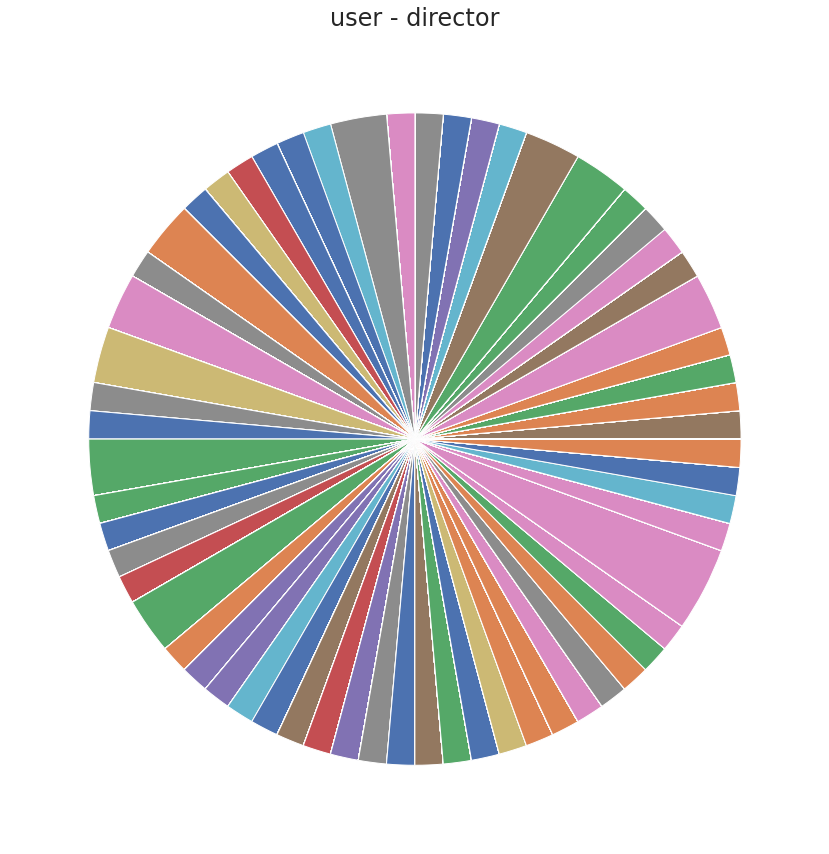

In [68]:
plt.figure(figsize=(15,15))
plt.title("user - director")
plt.pie(list(for_test_director[user].values()))
plt.show()

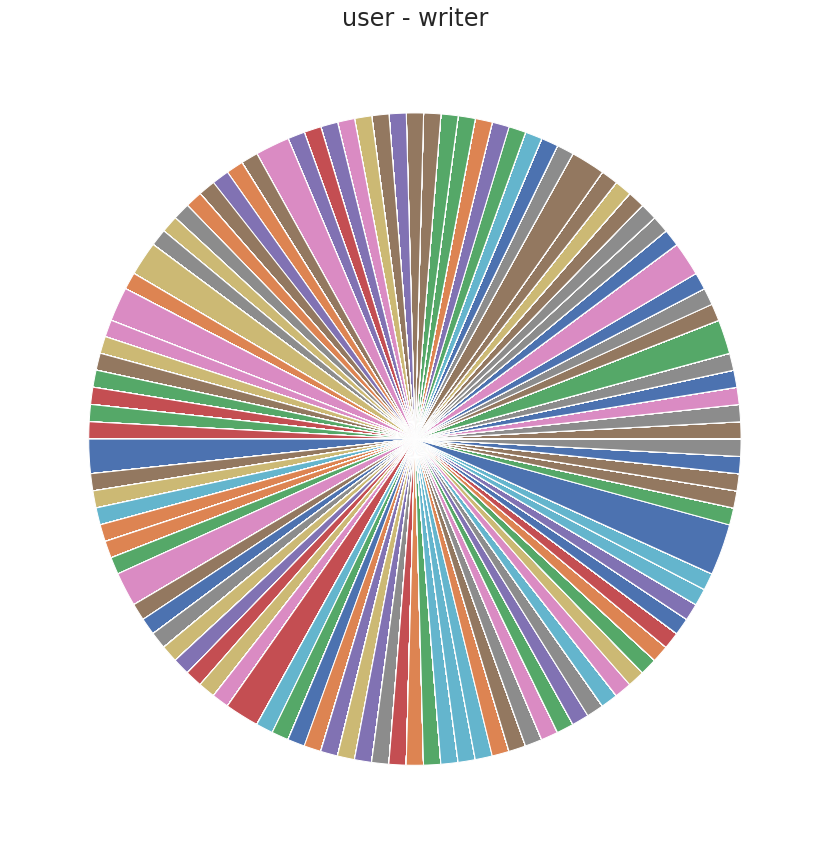

In [69]:
plt.figure(figsize=(15,15))
plt.title("user - writer")
plt.pie(list(for_test_writer[user].values()))
plt.show()

In [31]:
item_director_df = pd.merge(pd.DataFrame(set(df.item), columns=["item"]),item_director_df, on="item", how="outer").fillna(0)
item_director_df

,item,director
0,1,{nm0005124}
1,2,{nm0002653}
2,3,{nm0222043}
3,32770,{nm0081540}
4,5,{nm0796124}
...,...,...
6802,98243,{nm0709056}
6803,32721,{nm0002175}
6804,32728,0
6805,32743,0


In [32]:
for user in tmp_df[tmp_df.larger].index:
    user_favorite_director = tmp.columns[tmp_df[tmp_df.larger].loc[user,tmp_df[tmp_df.larger].columns[0]]]
    items = []
    for item, director in zip(item_director_df.item, item_director_df.director):
        if director==0 or user_favorite_director not in director:
            items.append(item)
    als_model_df_final.loc[als_model_df_final.index[user], items]-=1000 

### 각본가 마스킹

### 결과 출력

In [33]:
result = np.argpartition(als_model_df_final, -10).iloc[:, -10:]
result

item,116823,117176,117533,117881,118696,118700,118900,118997,119141,119145
user,,,,,,,,,,
11,4528,4597,612,1206,1458,2619,3663,2381,1,4790
14,1134,1004,1089,672,482,487,554,561,648,352
18,423,4806,627,4756,1281,2309,179,3057,644,4064
25,1532,146,41,670,580,1016,717,706,360,3567
31,3200,6173,3994,6084,5521,6410,5771,1462,3909,5788
...,...,...,...,...,...,...,...,...,...,...
138473,3654,5762,646,3038,161,5038,3679,77,423,356
138475,632,1685,478,1846,476,472,471,1032,2788,497
138486,1016,4098,2955,668,3989,352,1,3916,237,601


In [34]:
users, items = list(), list()
item_columns = als_model_df_final.columns
for idx in range(result.shape[0]):
    users.extend([result.index[idx]] * 10)
    for i in result.values[idx]:
        items.append(item_columns[i])
        
test_df = pd.DataFrame(zip(users,items), columns=['user','item'])
test_df.to_csv("/opt/ml/output/most_popular_submission.csv", index=False)

### 후보추천용 csv 제작

In [23]:
result

item,1,2,3,4,5,6,7,8,9,10,...,116823,117176,117533,117881,118696,118700,118900,118997,119141,119145
user,,,,,,,,,,,,,,,,,,,,,
11,2381,4790,1,3663,1458,2619,1206,612,4597,4528,...,6722,6762,6746,6760,6770,6752,6761,6758,6727,6767
14,352,648,561,554,482,672,1089,487,1004,1134,...,6102,5768,5939,6171,5975,6020,5792,6160,5744,5547
18,2309,179,644,4064,1281,3057,4756,627,4806,423,...,6784,6739,6749,6758,6793,6737,6768,6760,6770,6722
25,3567,360,706,717,1016,580,670,41,146,1532,...,6348,6521,6616,6415,6219,6477,6318,6352,6300,6257
31,5771,1462,3909,5788,6410,6084,5521,3994,6173,3200,...,2388,2781,2926,2733,2987,5034,2881,5140,2978,3267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138473,3038,3679,423,5038,161,77,356,646,5762,3654,...,6275,6428,6508,6299,6232,6239,6219,6619,6410,6257
138475,2788,497,476,471,1032,1846,472,478,1685,632,...,5026,5279,5494,4968,5147,4890,5669,5771,5329,5023
138486,3916,2955,3989,237,601,1,352,668,4098,1016,...,5818,5856,5823,6508,6015,5897,6481,6408,5939,5547


In [20]:
# result = np.argpartition(als_model_df_final, -50).iloc[:, -50:]
# result
result = np.argsort(-als_model_df_final)
pos_result = result.iloc[:,:50]
neg_result = result.iloc[:,50:100]
pos_result

item,1,2,3,4,5,6,7,8,9,10,...,46,47,48,50,52,57,58,60,61,62
user,,,,,,,,,,,,,,,,,,,,,
11,2381,4790,1,3663,1458,2619,1206,612,4597,4528,...,177,1114,2187,655,492,1097,1016,1719,3689,3563
14,352,648,561,554,482,672,1089,487,1004,1134,...,1356,612,4630,585,4790,1612,5375,3266,725,4108
18,2309,179,644,4064,1281,3057,4756,627,4806,423,...,4109,2200,890,41,5341,629,4418,668,5042,3661
25,3567,360,706,717,1016,580,670,41,146,1532,...,674,305,1610,1699,2659,920,358,3399,1501,424
31,5771,1462,3909,5788,6410,6084,5521,3994,6173,3200,...,5792,1004,2859,5712,5637,5995,3256,6737,4962,3562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138473,3038,3679,423,5038,161,77,356,646,5762,3654,...,1766,4301,5522,5283,492,1719,1837,947,1130,76
138475,2788,497,476,471,1032,1846,472,478,1685,632,...,589,2061,1935,697,1856,3845,1729,3453,691,3638
138486,3916,2955,3989,237,601,1,352,668,4098,1016,...,5279,5268,4659,2186,3193,2067,9,5037,1977,1949


In [63]:
result_idx = 0
for result in [pos_result, neg_result]:
    users, items = list(), list()
    item_columns = als_model_df_final.columns
    for idx in range(result.shape[0]):
        users.extend([result.index[idx]] * 50)
        for i in result.values[idx]:
            items.append(item_columns[i])
            
    test_df = pd.DataFrame(zip(users,items), columns=['user','item'])
    if result_idx == 0:
        test_df.to_csv("/opt/ml/train_pos_ratings.csv", index=False)
        result_idx+=1
    else:
        test_df.to_csv("/opt/ml/train_neg_ratings.csv", index=False)
test_df

,user,item
0,11,42738
1,11,54272
2,11,54259
3,11,48780
4,11,59615
...,...,...
1567995,138493,4085
1567996,138493,377
1567997,138493,8464
1567998,138493,33004


In [ ]:
test_df